<a href="https://colab.research.google.com/github/YipingNUS/machine-learning-labs/blob/master/lab8_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 8: Different MAB Algorithms for Exploration and Exploitation

Your task is as follows:
1. Implement the `pull` and `update` method in the `Bandit` class.
2. Implement epsilon-greedy algorithm and explore different epsilons.
3. Implement the two most popular exploration and exploitation algorithms, upper confidence bound and Thompson sampling.
4. Compare all the Bandit algorithms above and see which one yields the best cumulated reward.

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

Hint, to calculate the mean and variance in an online manner, you can keep track of the sum and sum of square of the data [Reference](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance). (This is needed for Thompson sampling)

```
Let n ← 0, Sum ← 0, SumSq ← 0, mean ← 0, var ← 0
For each datum x:
  n ← n + 1
  Sum ← Sum + x
  SumSq ← SumSq + x × x
  mean = Sum / n
  var = (SumSq − (Sum × Sum) / n) / (n − 1)
```

In [0]:
class Bandit:
  def __init__(self, m):
    """
    :param m  the real mean reward of the bandit. (not visible to the algorithm)
    """
    self.m = m
    self.mean = 0
    self.var = float('inf')
    self.N = 0
    self.sum = 0
    self.sumSq = 0

  def pull(self):
    """ observes the reward. The reward should be the real mean reward 
        +/- a random value 
    """
    TODO

  def update(self, x):
    """ update the stats
    """
    TODO

In [0]:
def epsilon_greedy(bandits, eps):
  """ select the bandit to pull using epsilon greedy
  :param bandits - the list of bandit objects to choose from
  :param eps - epsilon
  :return j - the index of the bandit to pull
  """
  j = np.random.choice(len(bandits))
  return j

In [0]:
def ucb(bandits, i):
  """ select the bandit to pull using upper confident bound
  :param bandits - the list of bandit objects to choose from
  :param n - the number of repeated experiments
  :return j - the index of the bandit to pull
  """
  j = np.random.choice(len(bandits))
  return j

In [0]:
def thompson_sampling(bandits):
  """ select the bandit to pull using Thompson Sampling
  :param bandits - the list of bandit objects to choose from
  :param n - the number
  :return j - the index of the bandit to pull
  """
  j = np.random.choice(len(bandits))
  return j

In [0]:
def run_experiment(bandits, eps, N, strategy='epsilon_greedy'):
  data = np.empty(N)
  
  for i in range(N):
    # epsilon greedy
    if strategy == 'epsilon_greedy':
      j = epsilon_greedy(bandits, eps)
    elif strategy == 'ucb':
      j = ucb(bandits, i)
    elif strategy == 'thompson_sampling':
      j = thompson_sampling(bandits)
    else:
      j = np.random.choice(len(bandits))
    x = bandits[j].pull()
    bandits[j].update(x)

    # for the plot
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

  return cumulative_average

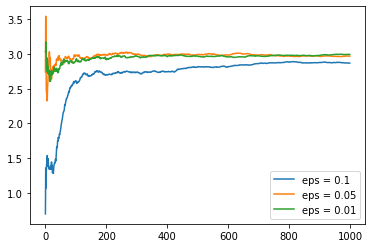

In [7]:
bandits = [Bandit(1.0), Bandit(2.0), Bandit(3.0)]
c_1 = run_experiment(bandits, 0.1, 1000)
c_05 = run_experiment(bandits, 0.05, 1000)
c_01 = run_experiment(bandits, 0.01, 1000)

plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()

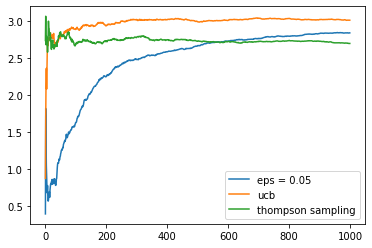

In [11]:
bandits = [Bandit(1.0), Bandit(2.0), Bandit(3.0)]
c_eps = run_experiment(bandits, 0.05, 1000, strategy='epsilon_greedy')
c_ucb = run_experiment(bandits, 0.05, 1000, strategy='ucb')
c_tp = run_experiment(bandits, 0.05, 1000, strategy='thompson_sampling')

plt.plot(c_eps, label='eps = 0.05')
plt.plot(c_ucb, label='ucb')
plt.plot(c_tp, label='thompson sampling')
plt.legend()
plt.show()